<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 54.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 38.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 35.4 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [11]:
## Write your code here
print(df[['Employment', 'JobSat', 'RemoteWork']].isna().sum())
most_remote = df['RemoteWork'].mode()[0]
df['RemoteWork'] = df['RemoteWork'].fillna(most_remote)
mean_jobsat = df['JobSat'].mean()
df['JobSat'] = df['JobSat'].fillna(mean_jobsat)
print(df[['Employment', 'JobSat', 'RemoteWork']].isna().sum())

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipykernel_423/3608686623.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('ExperienceRange')['JobSat']


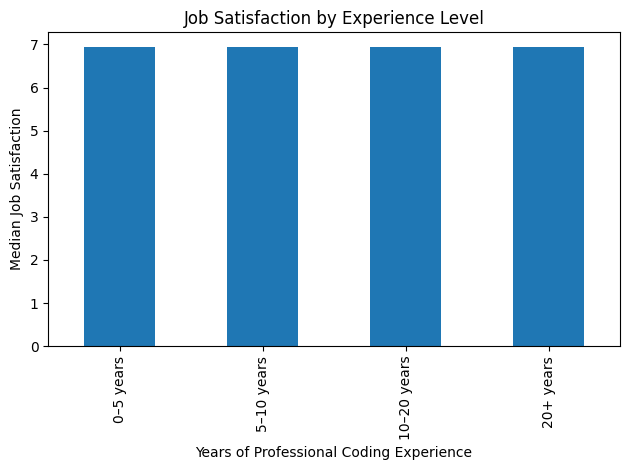

In [15]:
import numpy as np
## Write your code here
df['YearsCodePro_clean'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['ExperienceRange'] = pd.cut(
    df['YearsCodePro_clean'],
    bins=[0, 5, 10, 20, np.inf],
    labels=['0–5 years', '5–10 years', '10–20 years', '20+ years'],
    include_lowest=True
)
#Calculate Median
median_jobsat = (
    df
    .groupby('ExperienceRange')['JobSat']
    .median()
)
median_jobsat.plot(kind='bar')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction')
plt.title('Job Satisfaction by Experience Level')
plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


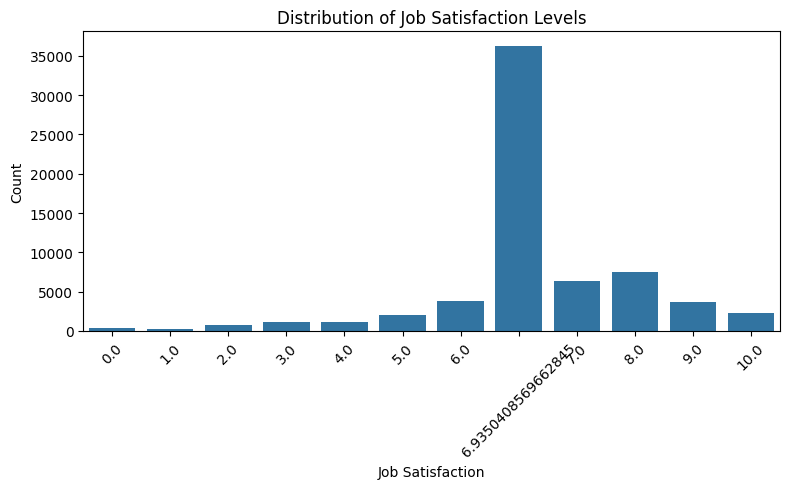

In [16]:
## Write your code here
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='JobSat')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.title('Distribution of Job Satisfaction Levels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


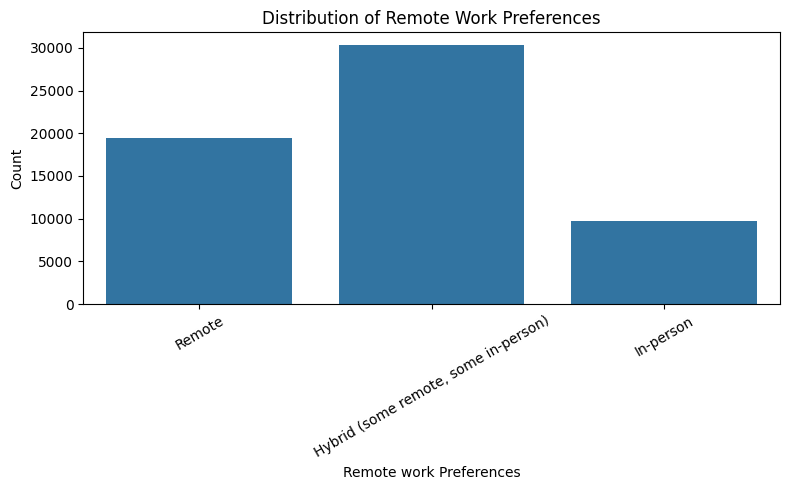

Employment                           Employed, full-time             \
DevType                              Academic researcher Blockchain   
RemoteWork                                                            
Hybrid (some remote, some in-person)                 324         17   
In-person                                            209         14   
Remote                                                43         66   

Employment                                                          \
DevType                              Cloud infrastructure engineer   
RemoteWork                                                           
Hybrid (some remote, some in-person)                           220   
In-person                                                       42   
Remote                                                         216   

Employment                                                                   \
DevType                              Data engineer Data or business analyst   
RemoteWork                                                                    
Hybrid (some remote, some in-person)           430                      178   
In-person                                      110                       96   
Remote                                         297                       77   

Employment                                                                          \
DevType                              Data scientist or machine learning specialist   
RemoteWork                                                                           
Hybrid (some remote, some in-person)                                           386   
In-person                                                                      126   
Remote                                                                         193   

Employment                                                            \
DevType                              Database administrator Designer   
RemoteWork                                                             
Hybrid (some remote, some in-person)                     42       29   
In-person                                                39       16   
Remote                                                   33       29   

Employment                                                                 \
DevType                              DevOps specialist Developer Advocate   
RemoteWork                                                                  
Hybrid (some remote, some in-person)               382                 24   
In-person                                           78                  7   
Remote                                             250                 45   

Employment                                                               \
DevType                              Developer Experience Developer, AI   
RemoteWork                                                                
Hybrid (some remote, some in-person)                   67           139   
In-person                                              25            90   
Remote                                                 70           100   

Employment                                                  \
DevType                              Developer, QA or test   
RemoteWork                                                   
Hybrid (some remote, some in-person)                   170   
In-person                                               48   
Remote                                                 176   

Employment                                                \
DevType                              Developer, back-end   
RemoteWork                                                 
Hybrid (some remote, some in-person)                3069   
In-person                                           1115   
Remote                                              3002   

Employment                                                                     

In [20]:
## Write your code here
analysis_df = df[['RemoteWork', 'Employment', 'DevType']].dropna()

plt.figure(figsize=(8, 5))
sns.countplot(data=analysis_df, x='RemoteWork')
plt.xlabel('Remote work Preferences')
plt.ylabel('Count')
plt.title('Distribution of Remote Work Preferences')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
#Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) .
remote_by_employment = pd.crosstab(
    analysis_df['RemoteWork'],
    [analysis_df['Employment'],analysis_df['DevType']]
)

remote_by_employment.head()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


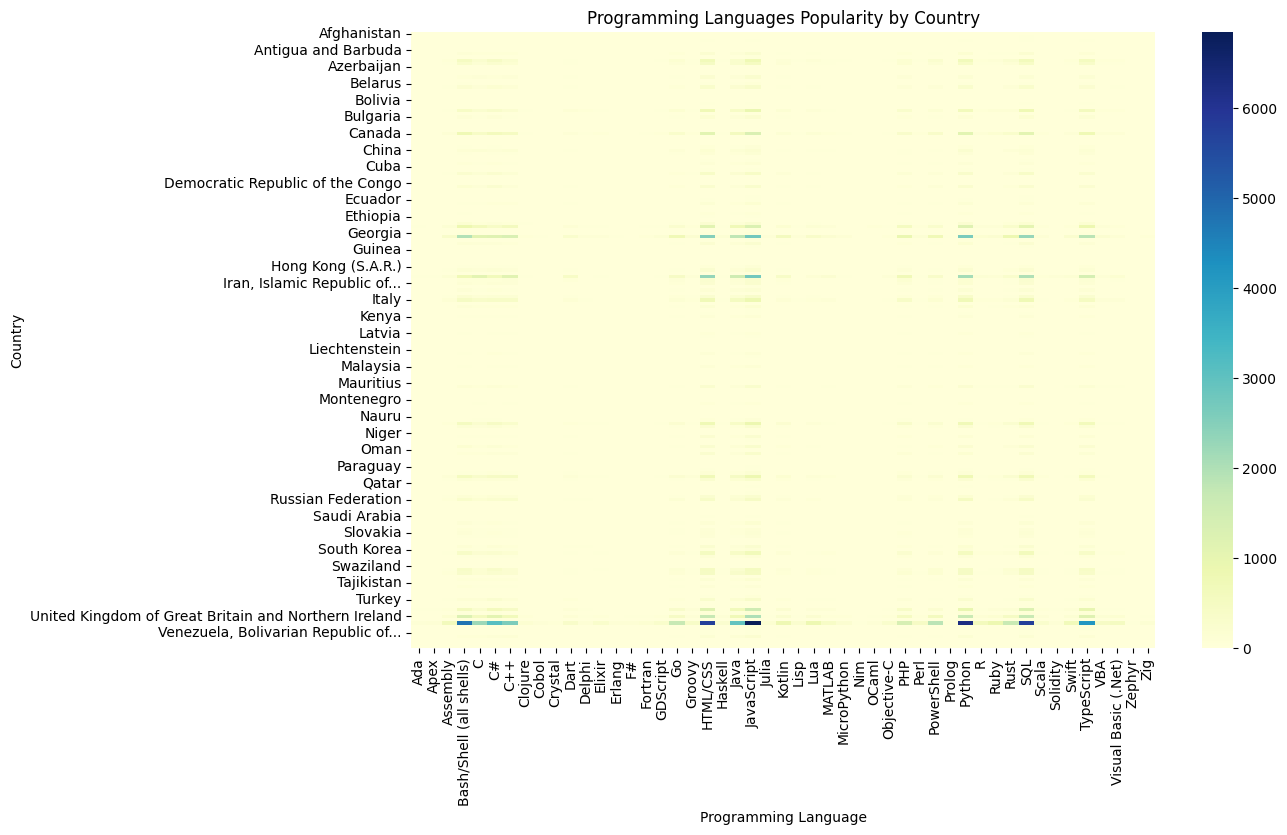

In [26]:
## Write your code here
# Select relevant columns and drop missing values
lang_df = df[['Country', 'LanguageHaveWorkedWith']].dropna()
# Split comma-separated languages into lists
lang_df['LanguageHaveWorkedWith'] = lang_df['LanguageHaveWorkedWith'].str.split(';')
# Explode the lists into separate rows
lang_exploded = lang_df.explode('LanguageHaveWorkedWith')
lang_counts = lang_exploded.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')
heatmap_df = lang_exploded.groupby(['Country', 'LanguageHaveWorkedWith']).size().unstack(fill_value=0)

plt.figure(figsize=(12,8))
sns.heatmap(heatmap_df, cmap='YlGnBu')
plt.xlabel('Programming Language')
plt.ylabel('Country')
plt.title('Programming Languages Popularity by Country')
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


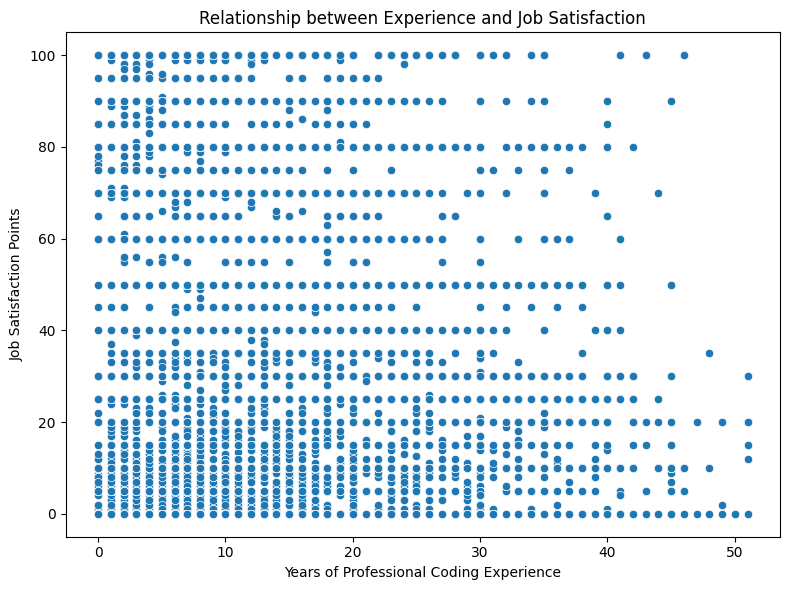

In [28]:
## Write your code here
# Convert YearsCodePro to numeric (handle strings like 'Less than 1 year')
# Select relevant columns and drop missing values
analysis_df = df[['YearsCodePro', 'JobSatPoints_1']].dropna()
analysis_df['YearsCodePro_clean'] = pd.to_numeric(
    analysis_df['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51}),
    errors='coerce'
)
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=analysis_df,
    x='YearsCodePro_clean',
    y='JobSatPoints_1'
)
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Points')
plt.title('Relationship between Experience and Job Satisfaction')
plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


/tmp/ipykernel_423/1898368522.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


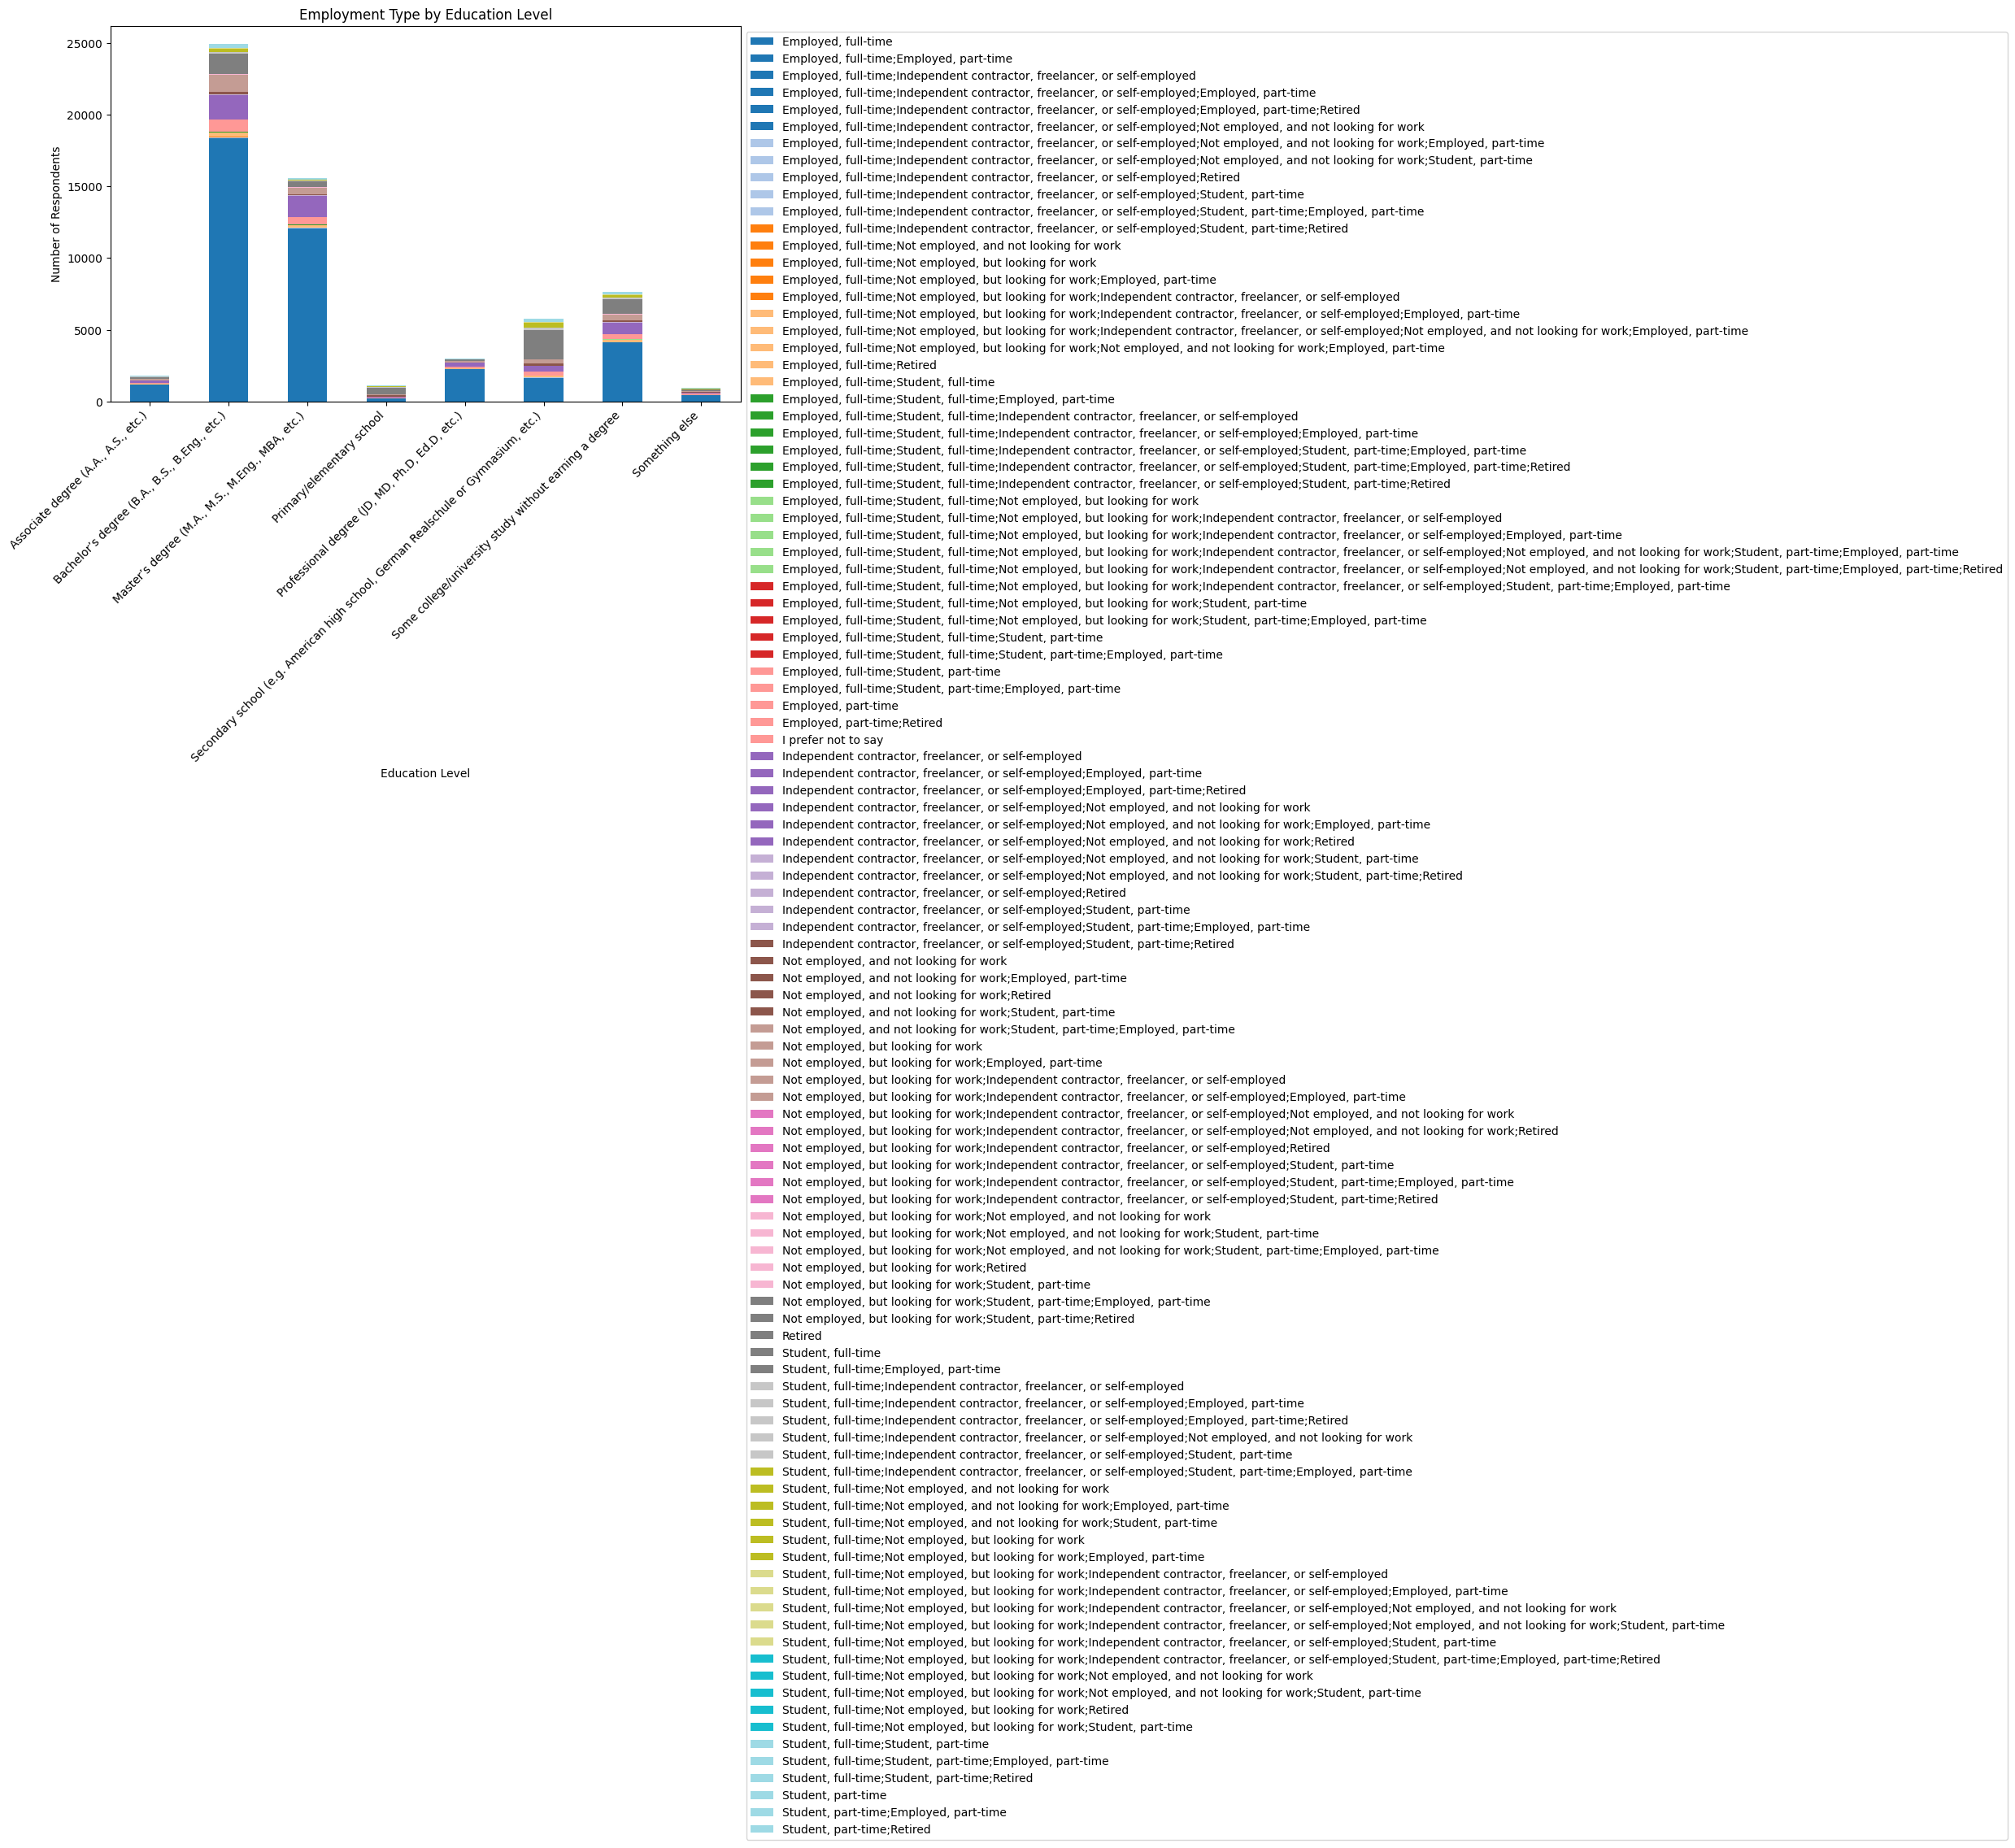

In [36]:
## Write your code here
# Select relevant columns and drop rows with missing values
edu_df = df[['EdLevel', 'Employment']].dropna()
edu_employment_ct = pd.crosstab(
    edu_df['EdLevel'],
    edu_df['Employment']
)

#print(edu_employment_ct)
edu_employment_ct.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='tab20'
)
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.title('Employment Type by Education Level')
plt.xticks(rotation=45, ha='right')
plt.legend(
    loc='upper left',            # Reference point of the legend
    bbox_to_anchor=(1, 1)        # (x, y) coordinates outside the axes
)

plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [37]:
## Write your code here
# Save the DataFrame to a CSV file
df.to_csv('modified_dataset.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
